# Uber Ride Data Analysis
# Author: Dilip Kumar Anjana
# Objective: Perform EDA and data preprocessing to extract business insights


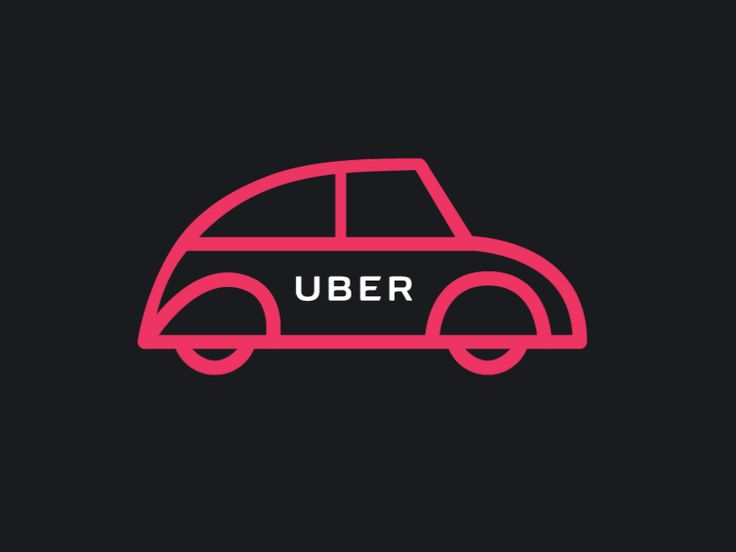

# Description of Uber and Notebook Work 🚗📓

**Uber**: Uber is a multinational transportation network company that operates through a mobile app, connecting passengers with drivers for on-demand rides. With a vast network of drivers and a user-friendly interface, Uber offers a convenient and reliable transportation service worldwide.

**Notebook Work**: In this notebook, we have analyzed a dataset containing information about Uber rides. The dataset includes details such as start and end dates, category, start and stop locations, miles traveled, and purpose of the ride. We have performed various tasks such as data cleaning, exploratory data analysis, and modeling using machine learning algorithms. Through visualizations and statistical analysis, we have gained insights into the patterns and trends present in the data.




# Importing Dependencies  🐍

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\dilee\3rd year sc with python\project\UberDataset.csv",na_values='-')

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
print(f"{Fore.GREEN}The Shape of Dataset is: {df.shape}.{Style.RESET_ALL}")

The Shape of Dataset is: (1156, 7).


In [5]:
print(f"{Fore.BLUE}Information of Features in Dataset: \n.{Style.RESET_ALL}")
df.info()

Information of Features in Dataset: 
.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
print(f"{Fore.RED}Statistical Analysis of Feature 'MILES: \n.{Style.RESET_ALL}")
df.describe()

Statistical Analysis of Feature 'MILES: 
.


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
print(f"{Fore.YELLOW}Duplicat Row in Dataset: \n.{Style.RESET_ALL}")

df[df.duplicated()]

Duplicat Row in Dataset: 
.


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
print(f"{Fore.MAGENTA}Null Values in Each Feature: \n.{Style.RESET_ALL}")
df.isnull().sum()

Null Values in Each Feature: 
.


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [10]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Feature Engineering 🔍

In [12]:
# Converting dtype as datetime 
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [13]:
# Renameing of features
df.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace=True)


In [14]:
# Creating new features for better analysis and accuracy

# df["year"] = df['start_date'].dt.year
df['day_name'] = df['start_date'].dt.day_name()

time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['time_label'] = pd.cut(df['start_date'].dt.hour, bins=time_periods, labels=labels, right=False)

df["month"] = df['start_date'].dt.month_name()

df['duration'] = (df['end_date'] - df['start_date']).astype('timedelta64[m]')


In [15]:
print(f"{Fore.LIGHTRED_EX}New Data: \n.{Style.RESET_ALL}")
data = df.copy()
df.head(5)

New Data: 
.


,start_date,end_date,category,start,stop,miles,purpose,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Afternoon,January,67.0


# Countplot 📊

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

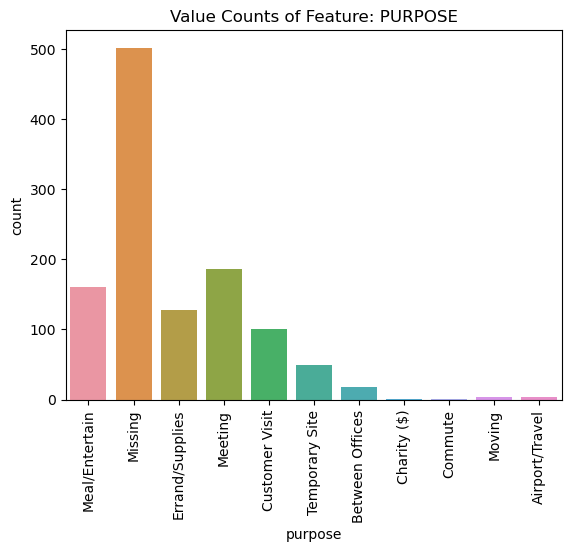

In [16]:
sns.countplot(x=df["purpose"])
plt.title("Value Counts of Feature: PURPOSE")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

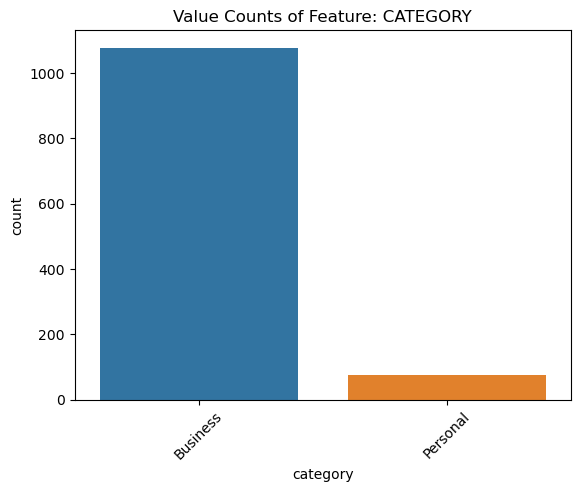

In [17]:
sns.countplot(x=df["category"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

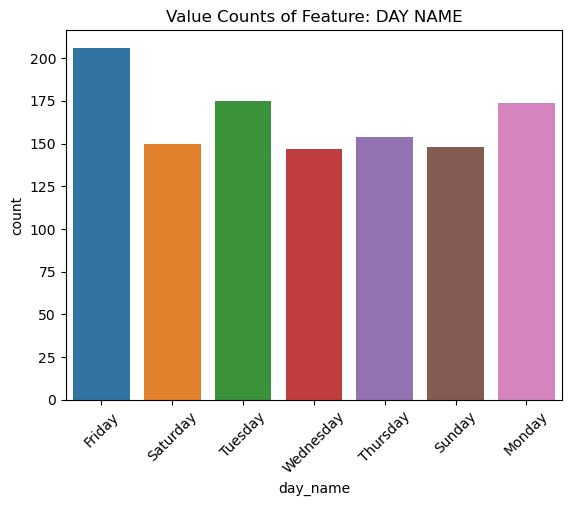

In [18]:
sns.countplot(x=df["day_name"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

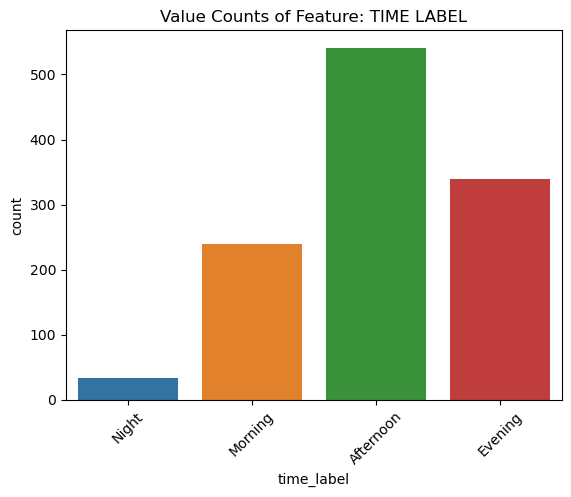

In [19]:
sns.countplot(x=df["time_label"])
plt.title("Value Counts of Feature: TIME LABEL")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

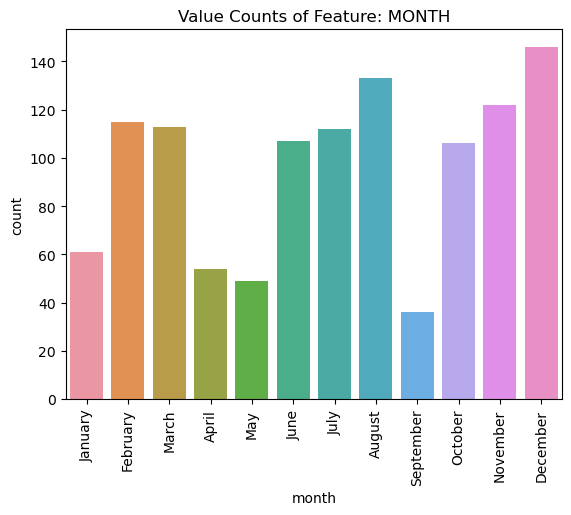

In [20]:
sns.countplot(x=df["month"])
plt.title("Value Counts of Feature: MONTH")
plt.xticks(rotation=90)

# Barplot 📊

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

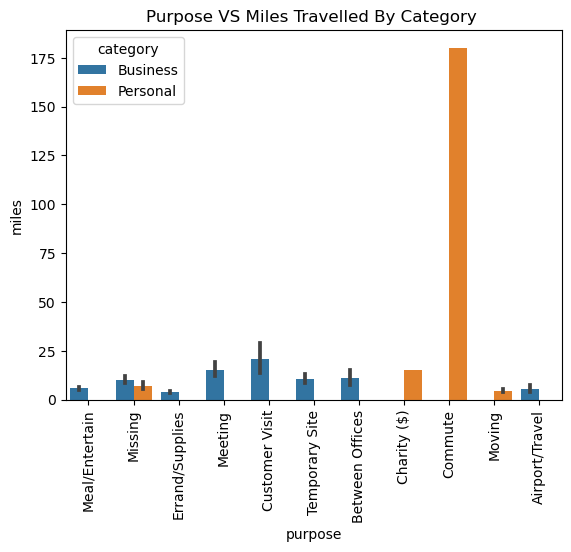

In [21]:
sns.barplot(x= df["purpose"], y= df['miles'],hue = df["category"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)

# Boxplot 📈

Text(0.5, 1.0, 'Outliers in MILES over TIME')

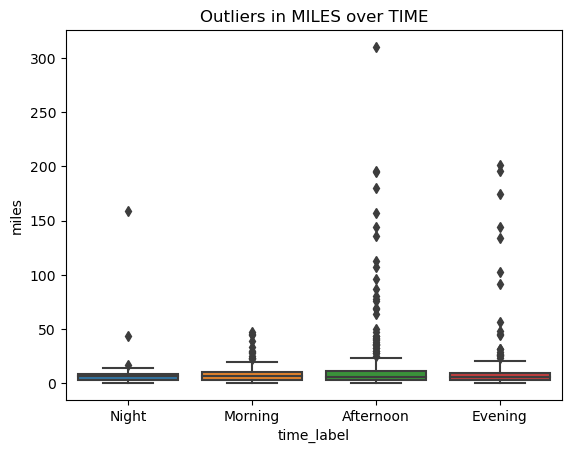

In [22]:
sns.boxplot(x=df["time_label"],y=df["miles"])
plt.title("Outliers in MILES over TIME")

Text(0.5, 1.0, 'Outliers in Duration')

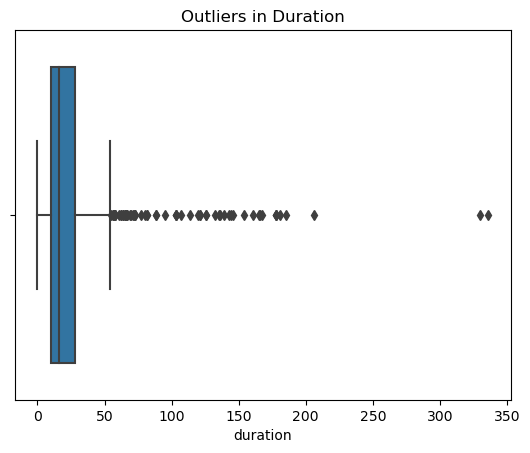

In [23]:
sns.boxplot(x=df["duration"],data=df)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

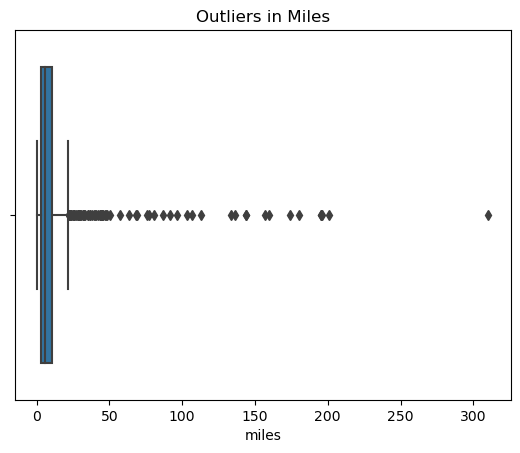

In [24]:
sns.boxplot(x=df['miles'],data = df)
plt.title("Outliers in Miles")

# Distplot 📊

Text(0.5, 1.0, 'Density PLot for Miles')

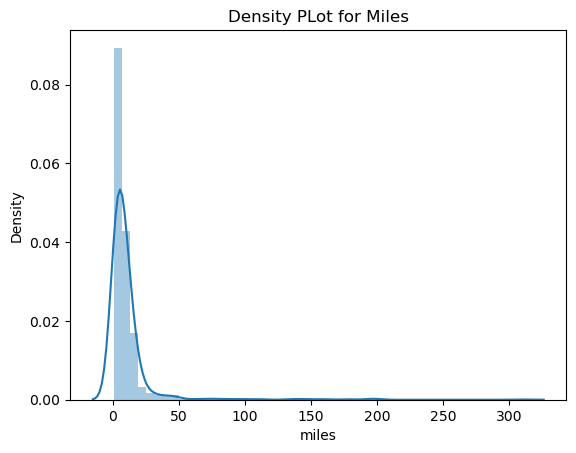

In [25]:
sns.distplot(df["miles"])
plt.title("Density PLot for Miles")

Text(0.5, 1.0, 'Density PLot for Duration')

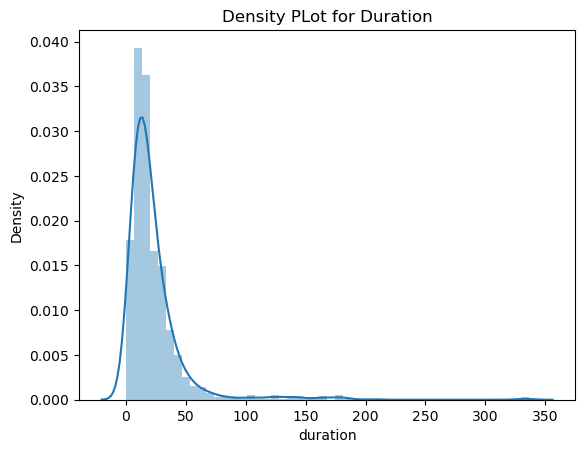

In [26]:
sns.distplot(df["duration"])
plt.title("Density PLot for Duration")

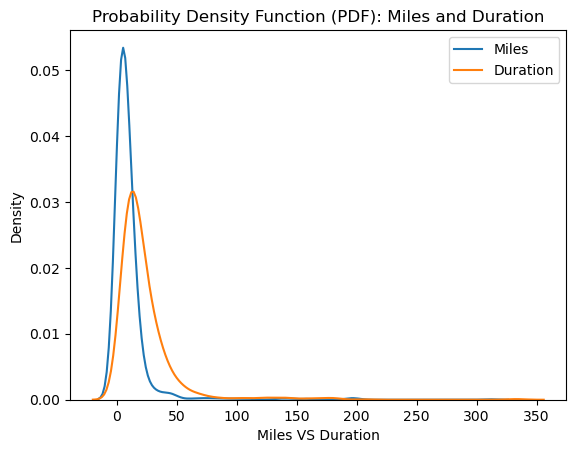

In [27]:
sns.distplot(df["miles"],hist = False,label="Miles")
sns.distplot(df["duration"],hist = False, label="Duration")
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()


# LinePlot 📊

Outliers in data: 
.


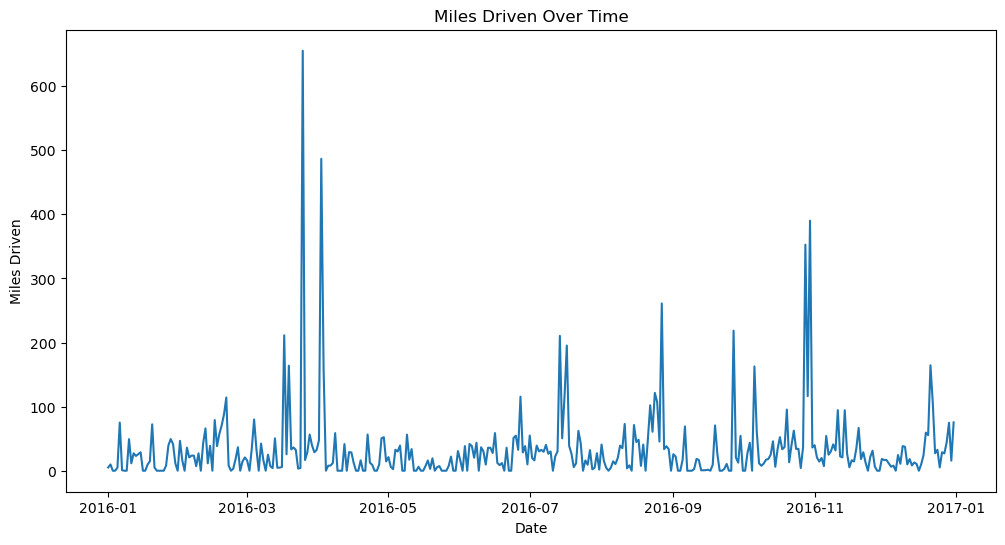

In [28]:
print(f"{Fore.CYAN}Outliers in data: \n.{Style.RESET_ALL}")
df = df[df['start_date'] != "Totals"]
df['start_date'] = pd.to_datetime(df['start_date'])
df.set_index('start_date', inplace=True)
daily_miles = df.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

In [29]:

# Calculate IQR for 'miles' feature
Q1_miles = np.percentile(df['miles'], 25)
Q3_miles = np.percentile(df['miles'], 75)
IQR_miles = Q3_miles - Q1_miles

# Calculate IQR for 'duration' feature
Q1_duration = np.percentile(df['duration'], 25)
Q3_duration = np.percentile(df['duration'], 75)
IQR_duration = Q3_duration - Q1_duration

# Define outlier boundaries
lower_bound_miles = Q1_miles - 1.5 * IQR_miles
upper_bound_miles = Q3_miles + 1.5 * IQR_miles

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Identify and deal with outliers
df['miles'] = np.where(df['miles'] < lower_bound_miles, lower_bound_miles, df['miles'])
df['miles'] = np.where(df['miles'] > upper_bound_miles, upper_bound_miles, df['miles'])

df['duration'] = np.where(df['duration'] < lower_bound_duration, lower_bound_duration, df['duration'])
df['duration'] = np.where(df['duration'] > upper_bound_duration, upper_bound_duration, df['duration'])


After Outliers Treatment: 
.


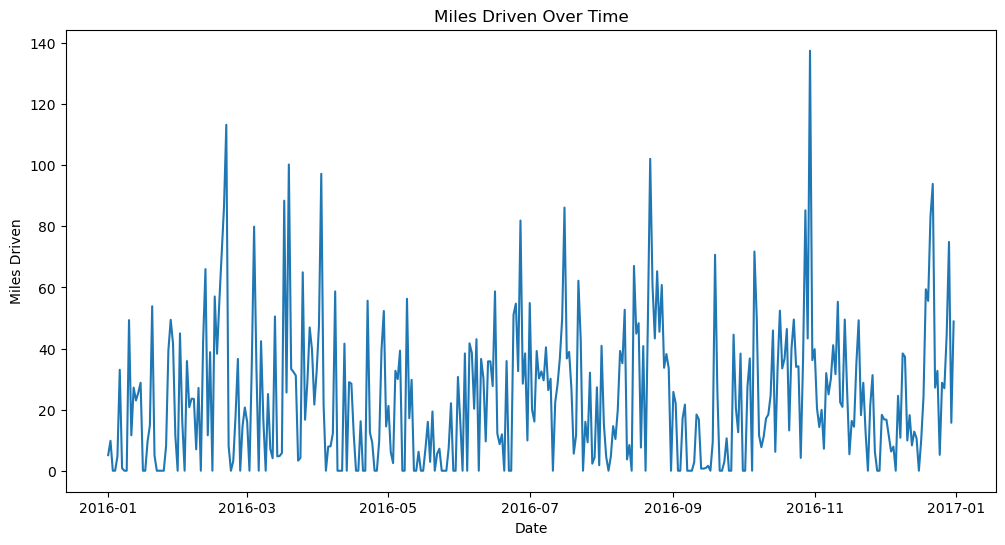

In [30]:
print(f"{Fore.RED}After Outliers Treatment: \n.{Style.RESET_ALL}")
daily_miles = df.resample('D')['miles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

# Encoding 🔢

In [31]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,day_name,time_label,month,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Afternoon,January,67.0
